## Bone segmentation example

First, we need to install some additional packages.

In [1]:
%%bash
pip install nibabel girder-client

Download our image using girder-client.

In [ ]:
import girder_client
client = girder_client.GirderClient(apiUrl='http://34.229.214.79/api/v1')
client.authenticate(apiKey='sLrP2DWBEUCZWnc5FiWT4I2WufA9AaFuRQm8bi1j')
client.downloadItem(itemId='5963f36c4d2d8d07eb720b09', dest='.')

Read in the downloaded image using nibabel, and display its dimensions and pixel type.

In [3]:
%matplotlib inline

import numpy as np
import nibabel
import matplotlib.pyplot as plt

nib_img = nibabel.load('./head_ct_small.nii.gz')
img = nib_img.get_data()
img.shape, img.dtype

((350, 424, 29), dtype('<i2'))

Display an axial slice of the image

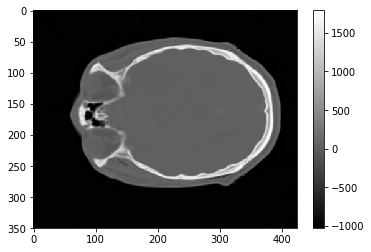

In [4]:
z_slice = img.shape[2] // 3
plt.imshow(img[:, :, z_slice], cmap=plt.cm.gray);
plt.colorbar();

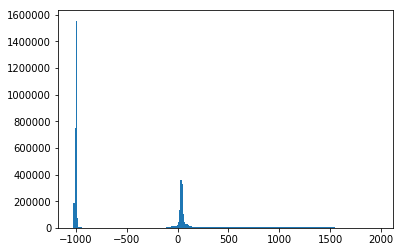

In [5]:
plt.hist(img.flat, bins=256, range=(np.amin(img), np.amax(img)));

Run a binary thresholding of the image above a known intensity in [Hounsfield units](https://en.wikipedia.org/wiki/Hounsfield_scale)

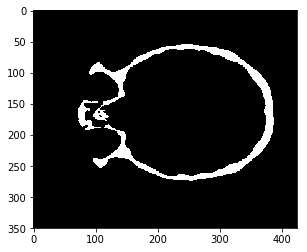

In [6]:
binary_img = img > 250
plt.imshow(binary_img[:, :, z_slice], cmap=plt.cm.gray);

Run a morphological closing to clean up small holes resulting from image noise or other problems

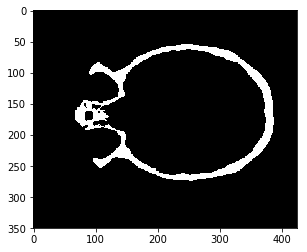

In [9]:
from skimage import morphology
closed_img = morphology.binary_closing(binary_img, selem=morphology.ball(radius=2))
plt.imshow(closed_img[:, :, z_slice], cmap=plt.cm.gray);

Save the resulting image to disk

In [8]:
out_img = nibabel.Nifti1Image(closed_img.astype(np.uint8), nib_img.affine)
out_img.to_filename('./segmented_bones.nii.gz')